# Week4DataLabI_LinearRegression

- If you take a look at the six graphs below, for which graphs do you think that simple linear regression is suitable, and for which not? Explain your answer for each of the six graphs.

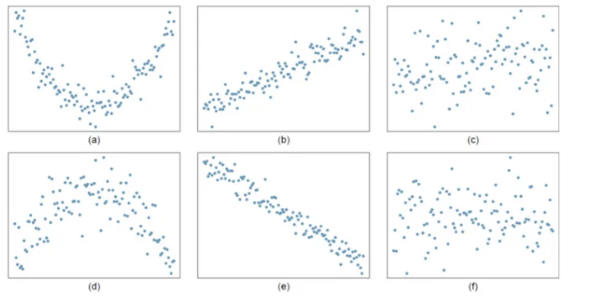

The answers of the question are e and b. a and d can't work because we need another linear regression not simple. C and F also doesn't work, cause the data is spread everywhere and we can't predict anything. That leaves b and which are the correct answer the reason being that the data is clustered in a line and we can predict more acurately what the outcome is going to be. 

- Why is it essential to minimize the number of residuals in a linear regression model?

Minimizing the sum of squared residuals in linear regression is essential for accuracy, optimal parameter estimation, adherence to assumptions like homoscedasticity and normality, and achieving unbiased and consistent results. It enhances the interpretability of the model and ensures its reliability for making predictions and drawing valid conclusions.

- If we consider the two regression plots below, which of the two plots has the best fitted line?

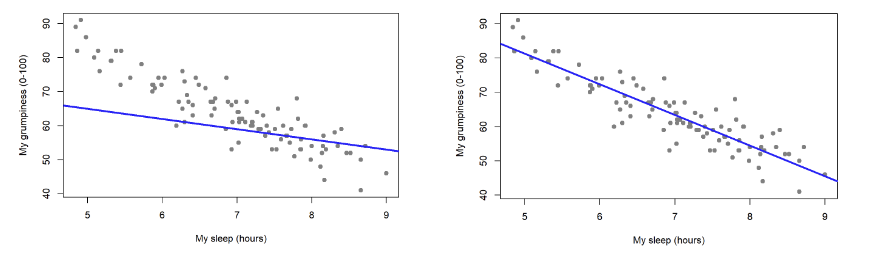

the second regression has a better line because it has less residuals. I explained in the question above why is this good.

--- 

### 2.3.1 Application of Housing Price Prediction data


- Load the data

In [22]:
import pandas as pd

# Load the dataset
file_path = 'Housing_data.xlsx'
hd = pd.read_excel(file_path)

# Display the first few rows of the dataset
hd.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- Prepare the data for simple Linear Regression


In [24]:
# Prepare the data for Simple Linear Regression
X_simple = hd[['area']]  # Independent variable
y = hd['price']          # Dependent variable

- Split the data into Training and Test sets


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'price' is the column you want to predict
 # Use .values to get a NumPy array

# Now, check the shapes again
print("X_simple shape:", X_simple.shape)
print("y shape:", y.shape)

# Perform the train-test split
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


X_simple shape: (545, 1)
y shape: (545,)


- Implement Simple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a linear regression model
simple_model = LinearRegression()

# Train the model
simple_model.fit(X_train_simple, y_train)

# Predicting the Test set results
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the Simple Linear Regression Model
simple_mse = mean_squared_error(y_test, y_pred_simple)
simple_r2 = r2_score(y_test, y_pred_simple)

- Implement Multiple Linear Regression


In [27]:
# Multiple Linear Regression

# Prepare the data for Multiple Linear Regression
X_multiple = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Independent variables

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create a linear regression model
multiple_model = LinearRegression()

# Train the model
multiple_model.fit(X_train_multiple, y_train)

# Predicting the Test set results
y_pred_multiple = multiple_model.predict(X_test_multiple)

# Evaluate the Multiple Linear Regression Model
multiple_mse = mean_squared_error(y_test, y_pred_multiple)
multiple_r2 = r2_score(y_test, y_pred_multiple)



- Interpret your results


- R-squared (R2 Score):

    - Higher values (closer to 1) indicate better model fit.
    - Measures the proportion of variance in the target variable explained by the model.
- Mean Squared Error (MSE):
    - Lower values indicate better predictive accuracy.
    - Measures the average squared difference between predicted and actual values.
- Comparison:
    - For R2, higher is better.
    - For MSE, lower is better.


- Based on the R-squared and Mean Squared Error values, the Multiple Linear Regression Model performs better than the Simple Linear Regression Model in explaining the variance and making accurate predictions.
- Give an explanation of why you think that one model outperforms the other model.

In [28]:
#results for the Simple Linear Regression Model
print("Simple Linear Regression Model:")
print("R-squared:", simple_r2)
print("Mean Squared Error:", simple_mse)
print("\n")

#results for the Multiple Linear Regression Model
print("Multiple Linear Regression Model:")
print("R-squared:", multiple_r2)
print("Mean Squared Error:", multiple_mse)


Simple Linear Regression Model:
R-squared: 0.27287851871974644
Mean Squared Error: 3675286604768.185


Multiple Linear Regression Model:
R-squared: 0.5464062355495873
Mean Squared Error: 2292721545725.3613


Conclusion:

Based on the R-squared and Mean Squared Error values, the Multiple Linear Regression Model performs better than the Simple Linear Regression Model in explaining the variance and making accurate predictions.

### Improving your model performance (Accuracy)

In [66]:
import pandas as pd

# Load the dataset
file_path = 'Housing_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# One-hot encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the first few rows of the processed data
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


- Train the data 

In [68]:
# Create a linear regression model
regression_model = LinearRegression()

# Train the model on the training data
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 976484771024.6133
R-squared: 0.6611214250980095


- Improved model performance 

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Housing_data.xlsx'
housing_data = pd.read_excel(file_path)

# Data Preprocessing
# Encoding categorical variables
le = LabelEncoder()
categorical_columns = housing_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    housing_data[col] = le.fit_transform(housing_data[col])

# Selecting features and target variable
X = housing_data.drop('price', axis=1)
y = housing_data['price']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1771751116594.0352
Root Mean Squared Error: 1331071.4167895108


### Footbal data

- load the data 

In [8]:
fb = pd.read_csv("football_data.csv")

C:\Users\35988\AppData\Local\Temp\ipykernel_3432\2191049014.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


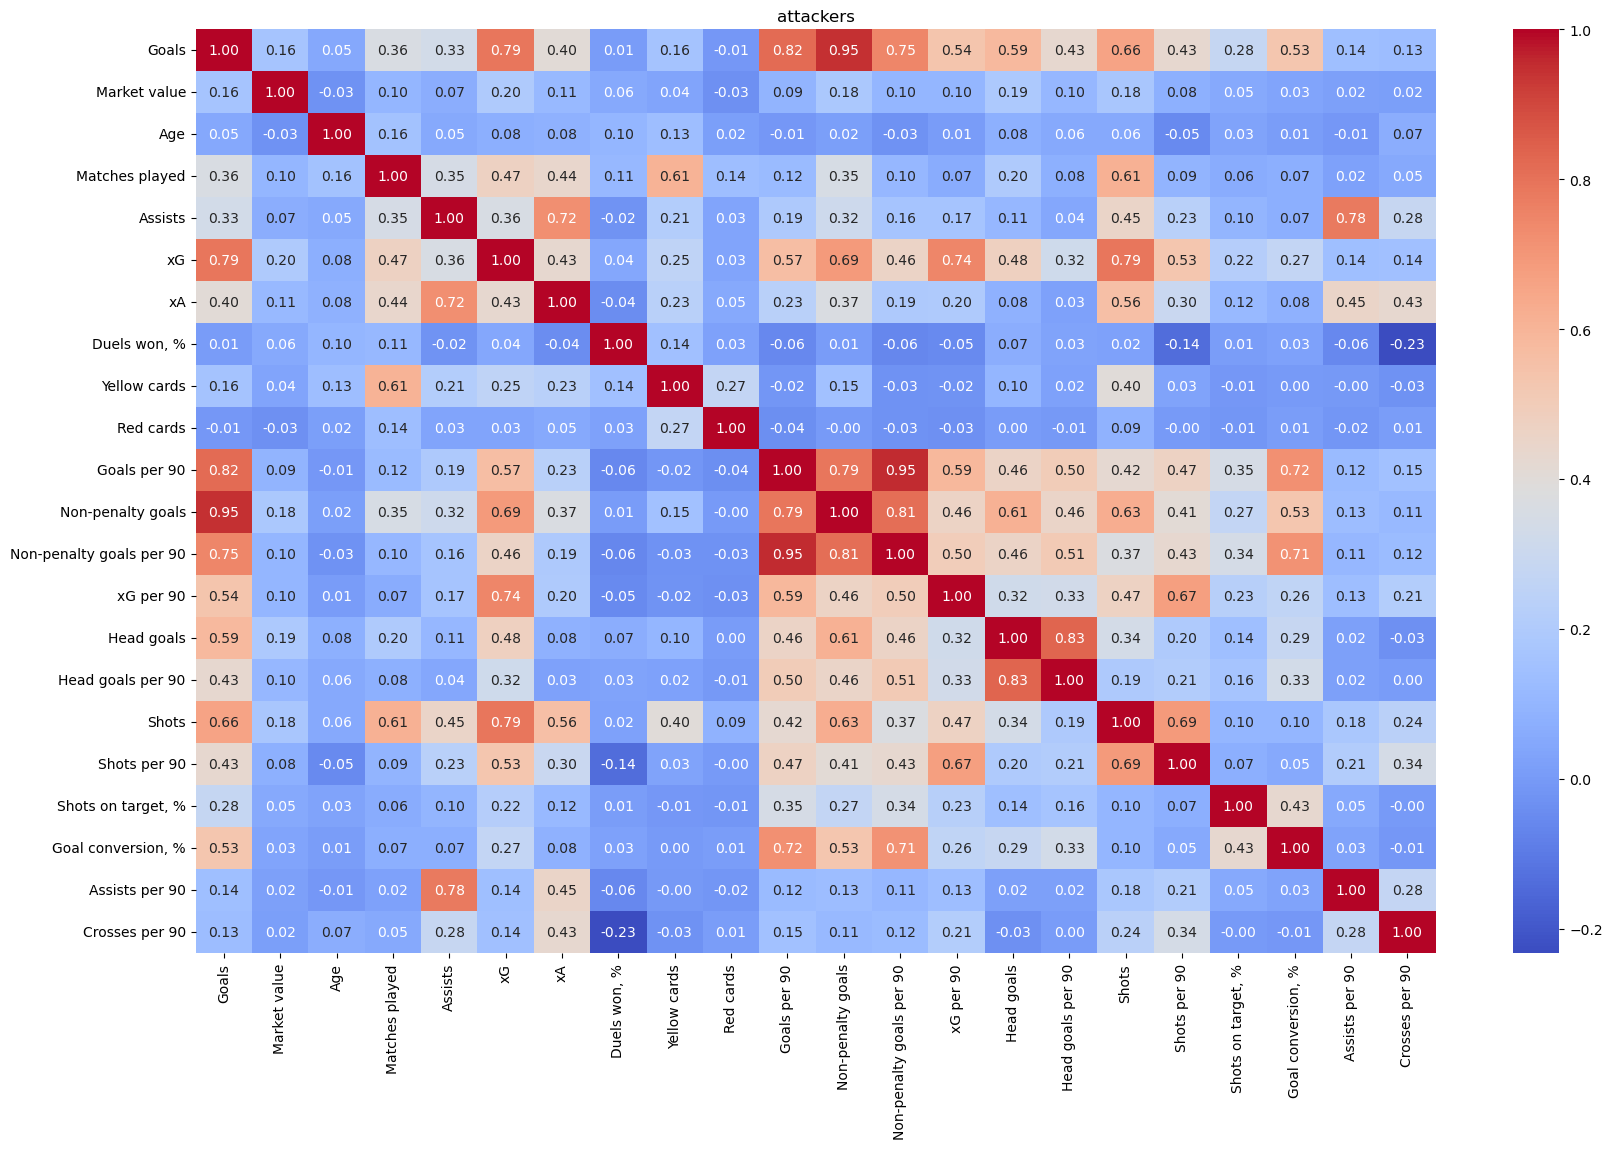

C:\Users\35988\AppData\Local\Temp\ipykernel_3432\2191049014.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


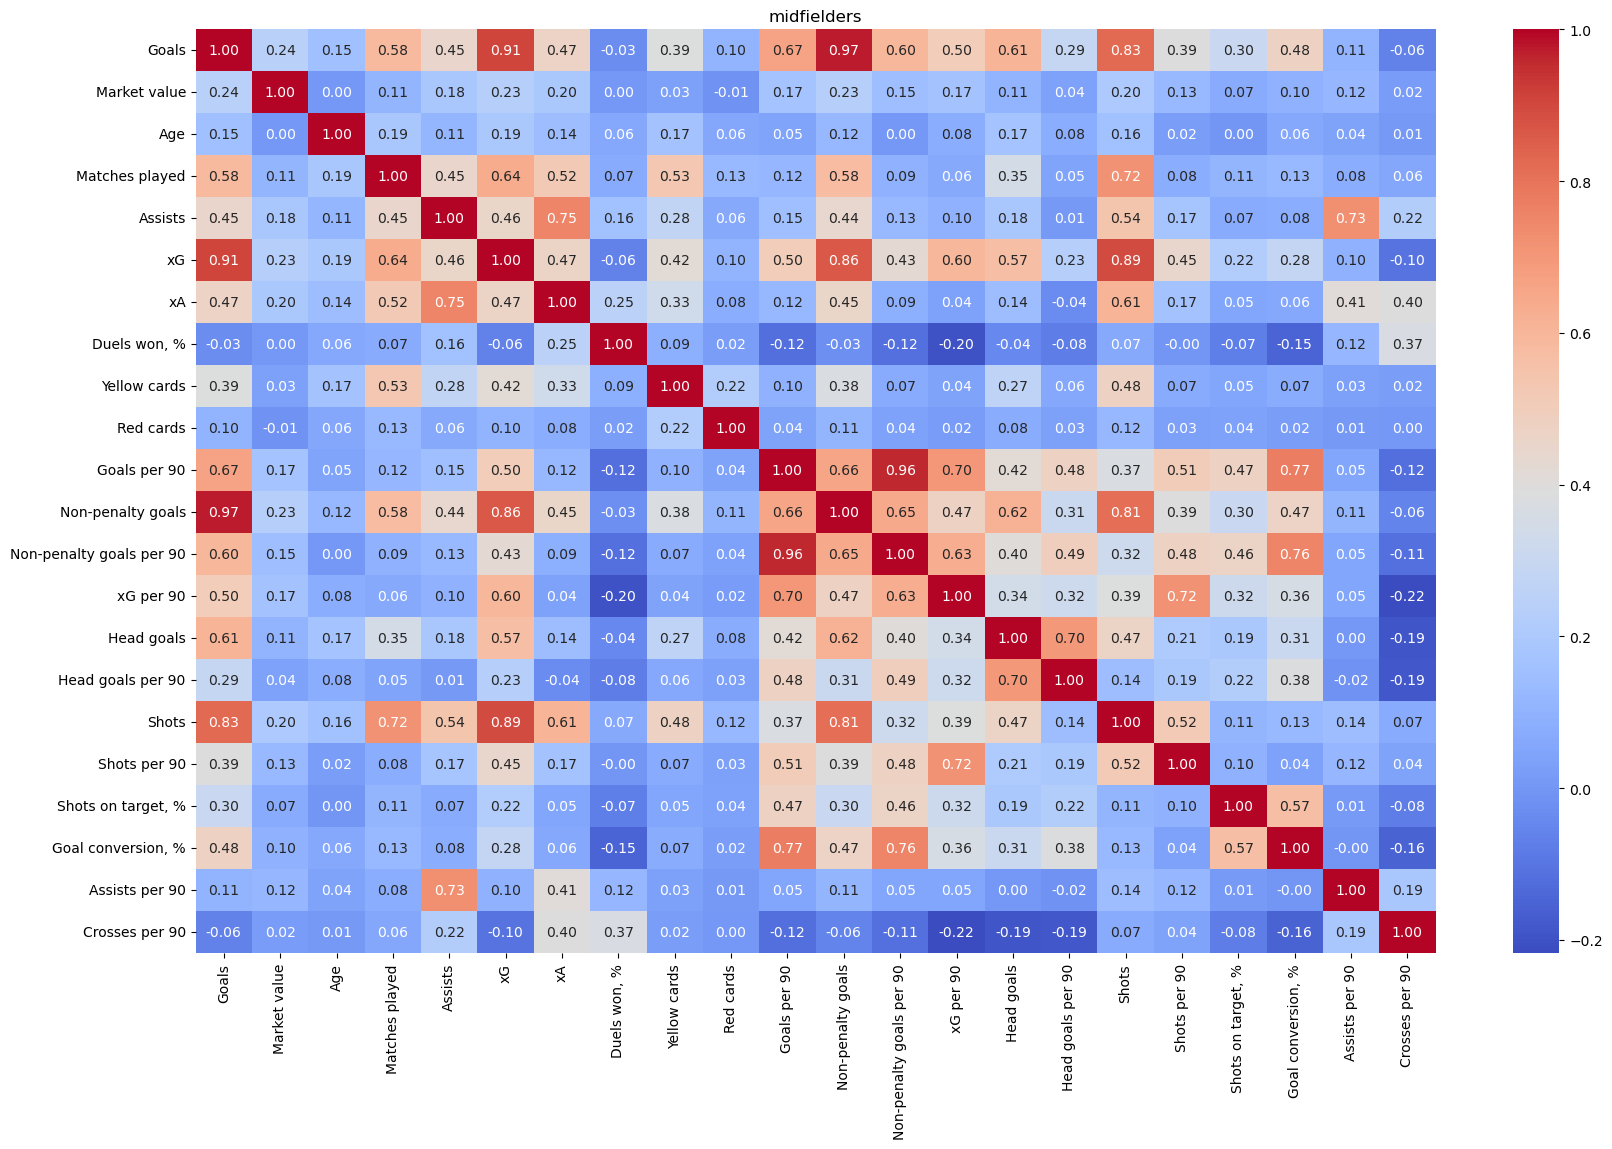

C:\Users\35988\AppData\Local\Temp\ipykernel_3432\2191049014.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


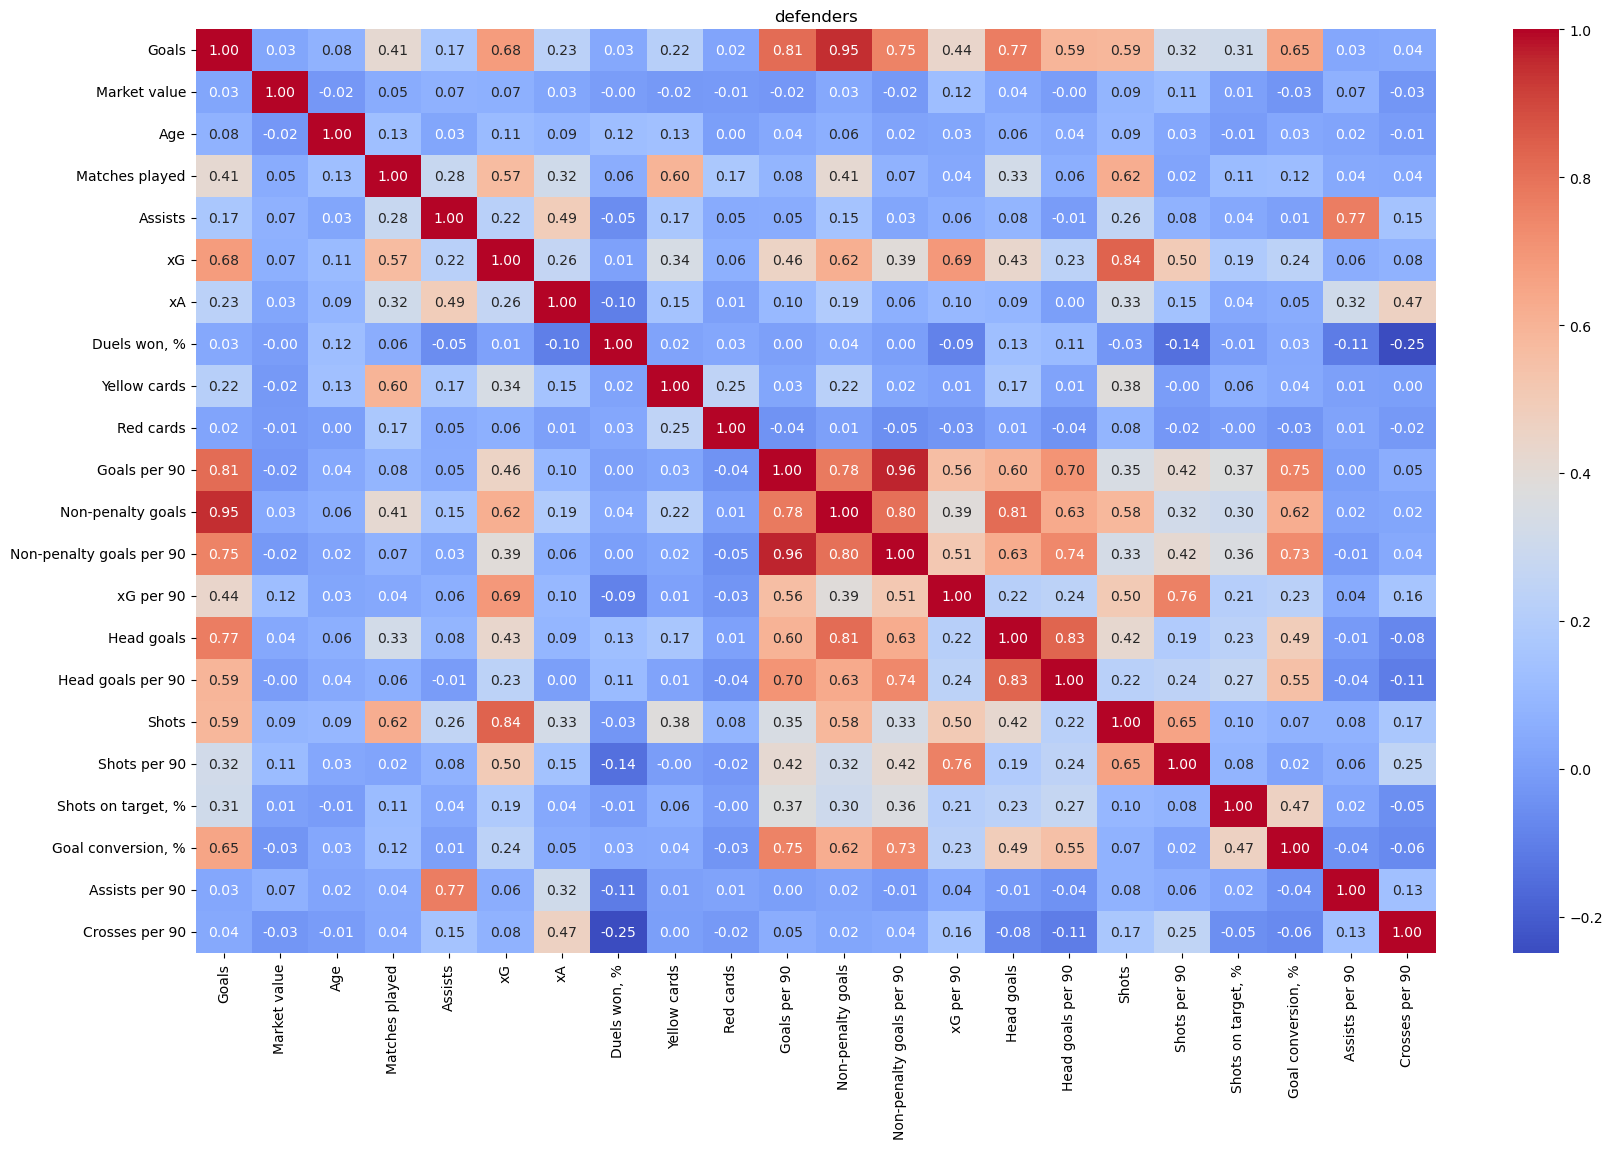

C:\Users\35988\AppData\Local\Temp\ipykernel_3432\2191049014.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


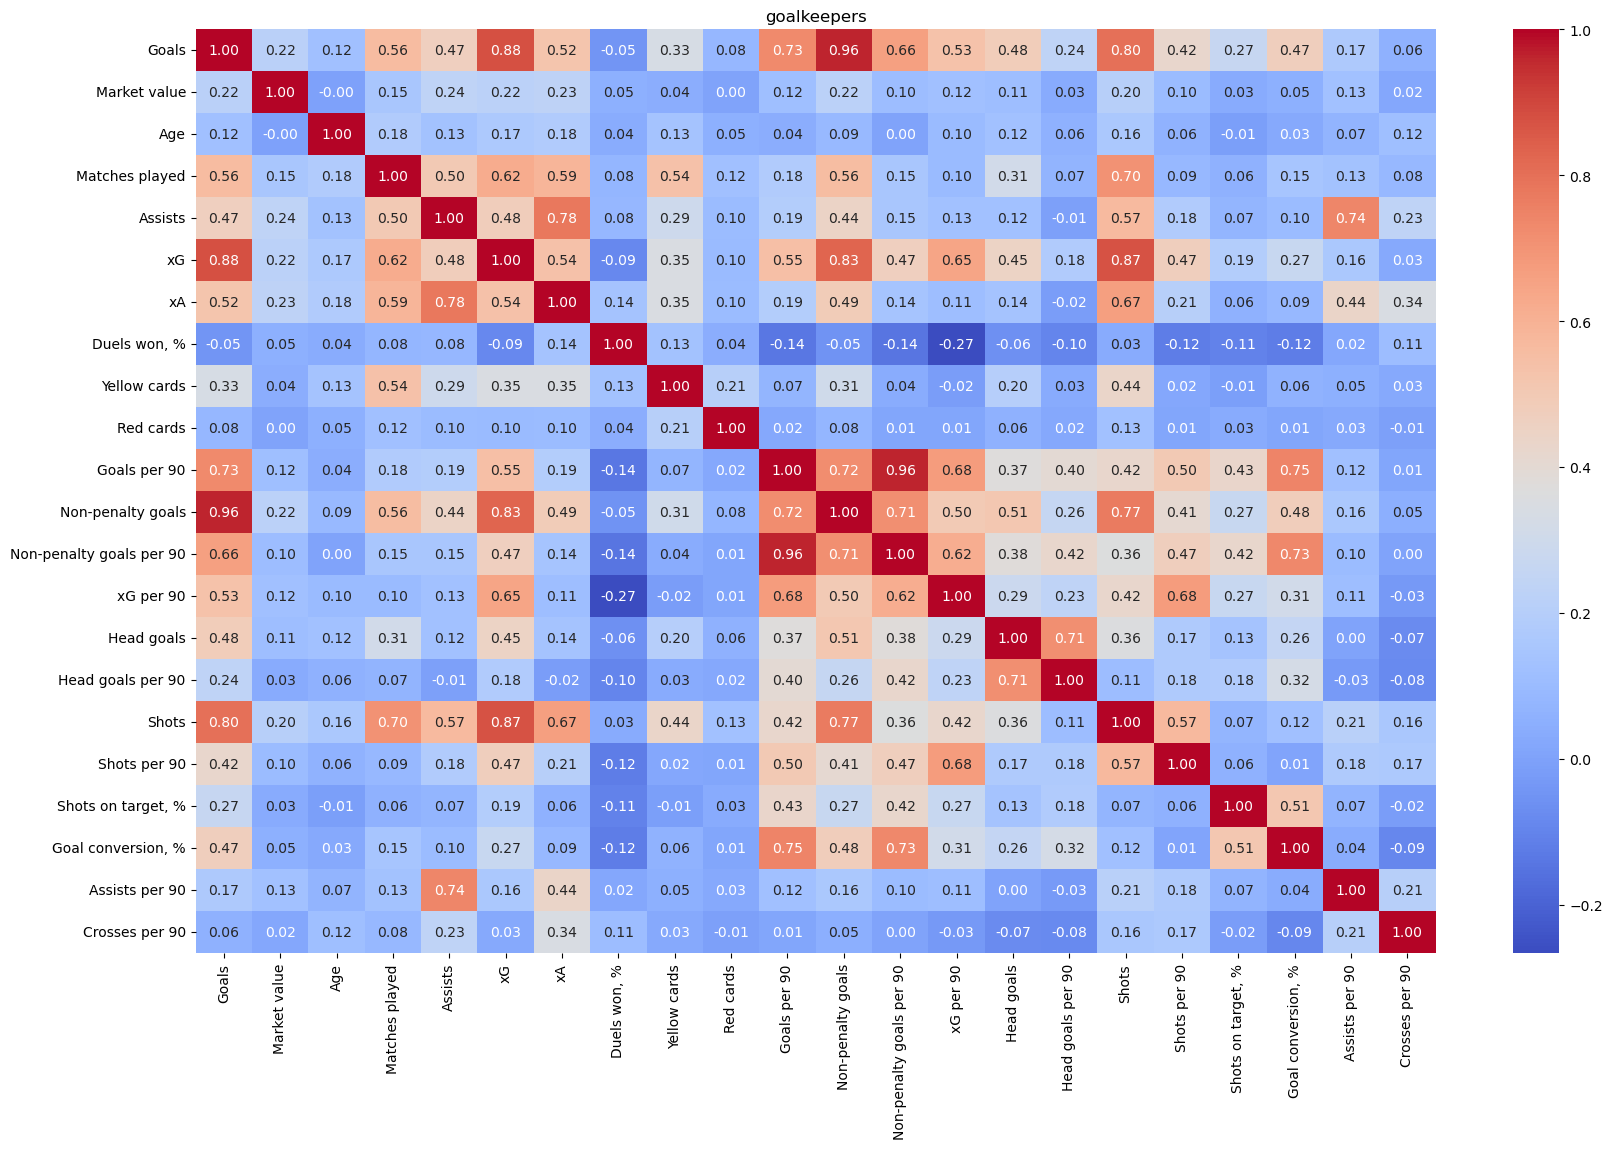

In [99]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'fb' is your original dataframe

# Copy relevant columns
fb_copy = fb[["Position", "Goals", "Market value", "Age", "Matches played", "Assists", "xG", "xA", "Duels won, %", "Yellow cards", "Red cards", "Goals per 90",
"Non-penalty goals",
"Non-penalty goals per 90",
"xG per 90",
"Head goals",
"Head goals per 90",
"Shots",
"Shots per 90",
"Shots on target, %",
"Goal conversion, %",
"Assists per 90",
"Crosses per 90"]].copy()
# feture 
features_iteration = ["Goals", "Assists", "xA", "Matches played", "Age", "Shots on target, %", "Goal conversion, %", "Shots per 90"]


# Split the positions into lists
fb_copy["Position"] = fb_copy["Position"].str.split(', ')

# Explode the lists into separate rows
fb_copy_explode = fb_copy.explode("Position")
b_copy_explode = fb_copy_explode.dropna(subset=features_iteration1 + ["Market value"])

# Use LabelEncoder to encode positions
le = LabelEncoder()
fb_copy_explode["Position_encoded"] = le.fit_transform(fb_copy_explode["Position"])

# Define position categories
position_mapping = {
    0: 'GK',    # Goalkeepers
    1: 'B',     # Defenders
    2: 'M',     # Midfielders
    3: 'F'      # Attackers
}

# Map the encoded values to the position categories
fb_copy_explode["Position_category"] = fb_copy_explode["Position_encoded"].map(position_mapping)

# Separate the data based on positions
goalkeepers = fb_copy_explode[fb_copy_explode['Position_category'] == 'GK']
defenders = fb_copy_explode[fb_copy_explode['Position_category'] == 'B']
midfielders = fb_copy_explode[fb_copy_explode['Position_category'] == 'M']
attackers = fb_copy_explode[fb_copy_explode['Position_category'] == 'F']
data_frame_list =[attackers, midfielders, defenders, goalkeepers]
data_frame_list_2 =["attackers", "midfielders", "defenders", "goalkeepers"]
# Now, 'Position_encoded' contains the numerical representation you desire,
# and 'Position_category' contains the original position category.
for df, name in zip(data_frame_list, data_frame_list_2):

    # Drop the temporary columns used for encoding and mapping
    df.drop(columns=["Position_encoded", "Position_category"], inplace=True)

    # Select only numeric columns for correlation matrix calculation
    numeric_columns = df.select_dtypes(include='number').columns
    correlation_matrix = df[numeric_columns].corr()

    # Display correlation values with the target variable "Market value"
    correlation_with_market_value = correlation_matrix["Market value"].sort_values(ascending=False)
    correlation_with_market_value
    import seaborn as sns

    # Assuming correlation_matrix is a Pandas DataFrame with correlation values
    plt.figure(figsize=(20, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(name)
    plt.show()
    

Mean Squared Error (Iteration 1): 1568687016146.517


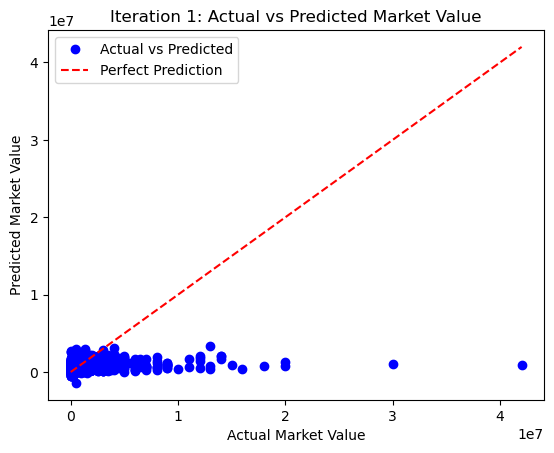

,Feature,Coefficient
0,Goals,-1.637320e+05
1,Position_encoded,3.929919e+03
2,Age,-6.168351e+03
3,Matches played,4.121095e+02
4,Assists,3.591207e+04
5,xG,8.356318e+04
6,xA,1.349472e+05
7,"Duels won, %",1.310446e+04
8,Yellow cards,-5.761798e+03
9,Red cards,-3.665828e+04


In [106]:
from sklearn.impute import SimpleImputer

# Choose a set of features for Iteration 1
features_iteration1 = ["Goals","Position_encoded", "Age", "Matches played", "Assists", "xG", "xA", "Duels won, %", "Yellow cards", "Red cards", "Goals per 90",
"Non-penalty goals",
"Non-penalty goals per 90",
"xG per 90",
"Head goals",
"Head goals per 90",
"Shots",
"Shots per 90",
"Shots on target, %",
"Goal conversion, %",
"Assists per 90",
"Crosses per 90"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_iteration1 = fb_copy_explode[features_iteration1]
X_iteration1 = imputer.fit_transform(X_iteration1)

y_iteration1 = fb_copy_explode["Market value"]

# Training and Testing
X_train_iter1, X_test_iter1, y_train_iter1, y_test_iter1 = train_test_split(X_iteration1, y_iteration1, test_size=0.2, random_state=42)

# Create a linear regression model
model_iter1 = LinearRegression()

# Train the model
model_iter1.fit(X_train_iter1, y_train_iter1)

# Testing the model
y_pred_iter1 = model_iter1.predict(X_test_iter1)

# Evaluation
mse_iter1 = mean_squared_error(y_test_iter1, y_pred_iter1)
print("Mean Squared Error (Iteration 1):", mse_iter1)

# Visualization
import matplotlib.pyplot as plt

# Visualization as a line plot
import numpy as np

# Replace 0 values with NaN in the predicted values
y_pred_iter1[y_pred_iter1 == 0] = np.nan

# Replace NaN values with the mean of the predicted values
mean_prediction = np.nanmean(y_pred_iter1)
y_pred_iter1 = np.where(np.isnan(y_pred_iter1), mean_prediction, y_pred_iter1)

# Visualization with replaced values
plt.plot(y_test_iter1, y_pred_iter1, 'o', color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_iter1), max(y_test_iter1)], [min(y_test_iter1), max(y_test_iter1)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Iteration 1: Actual vs Predicted Market Value")
plt.legend()
plt.show()

# Interpretation
coefficients_iter1 = pd.DataFrame({"Feature": features_iteration1, "Coefficient": model_iter1.coef_})
coefficients_iter1


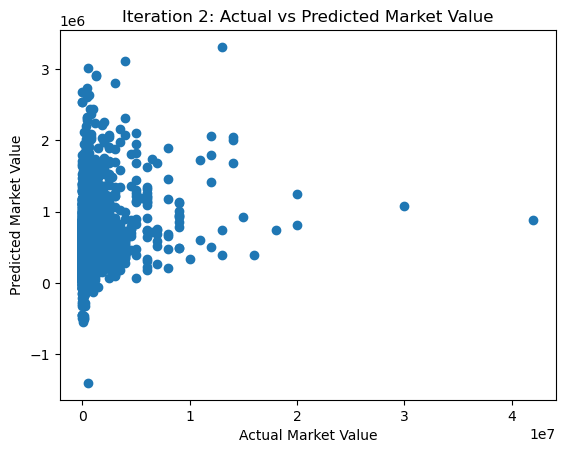

Mean Squared Error (Iteration 2): 1568687016146.517


In [107]:
# Choose a set of features for Iteration 2
features_iteration2 = ["Goals", "Age","Position_encoded", "Matches played", "Assists", "xG", "xA", "Duels won, %", "Yellow cards", "Red cards", "Goals per 90",
"Non-penalty goals",
"Non-penalty goals per 90",
"xG per 90",
"Head goals",
"Head goals per 90",
"Shots",
"Shots per 90",
"Shots on target, %",
"Goal conversion, %",
"Assists per 90",
"Crosses per 90"]

# Impute missing values
X_iteration2 = fb_copy_explode[features_iteration2]

# Reorder columns to match the order during fit
X_iteration2 = X_iteration2[features_iteration1]

# Use the same imputer to transform the data
X_iteration2 = imputer.transform(X_iteration2)

# Training and Testing
X_train_iter2, X_test_iter2, y_train_iter2, y_test_iter2 = train_test_split(X_iteration2, y_iteration1, test_size=0.2, random_state=42)

# Create a linear regression model for iteration 2
model_iter2 = LinearRegression()
model_iter2.fit(X_train_iter2, y_train_iter2)
y_pred_iter2 = model_iter2.predict(X_test_iter2)

# Visualization for iteration 2
plt.scatter(y_test_iter2, y_pred_iter2)
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Iteration 2: Actual vs Predicted Market Value")
plt.show()
mse_iter2 = mean_squared_error(y_test_iter2, y_pred_iter2)
print("Mean Squared Error (Iteration 2):", mse_iter2)
